# Project Description 

 
Classification is probably the most popular task that you would deal with in real life.
Text in the form of blogs, posts, articles, etc. is written every second. It is a challenge to predict the information about the writer without knowing about him/her. 

We are going to create a classifier that predicts multiple features of the author of a given text.
We have designed it as a Multilabel classification problem.


# Dataset 


Blog Authorship Corpus
Over 600,000 posts from more than 19 thousand bloggers

The Blog Authorship Corpus consists of the collected posts of 19,320 bloggers gathered from blogger.com in August 2004. The corpus incorporates a total of 681,288 posts and over 140 million words - or approximately 35 posts and 7250 words per person.

Each blog is presented as a separate file, the name of which indicates a blogger id# and the blogger’s self-provided gender, age, industry, and astrological sign. (All are labeled for gender and age but for many, industry and/or sign is marked as unknown.)

All bloggers included in the corpus fall into one of three age groups:
8240 "10s" blogs (ages 13-17),
8086 "20s" blogs(ages 23-27)
2994 "30s" blogs (ages 33-47)

For each age group, there is an equal number of male and female bloggers.
Each blog in the corpus includes at least 200 occurrences of common English words. All formatting has been stripped with two exceptions. Individual posts within a single blogger are separated by the date of the following post and links within a post are denoted by the label urllink.

Link to dataset: https://www.kaggle.com/rtatman/blog-authorship-corpus/downloads/blog-authorship-corpus.zip/2at


# Approach & Steps 

1.	Load the dataset (5 points)

a.	Tip: As the dataset is large, use fewer rows. Check what is working well on your machine and decide accordingly.

2.	Preprocess rows of the “text” column (7.5 points)

a.	Remove unwanted characters

b.	Convert text to lowercase

c.	Remove unwanted spaces

d.	Remove stopwords

3.	As we want to make this into a multi-label classification problem, you are required to merge all the label columns together, so that we have all the labels together for a particular sentence (7.5 points)

a.	Label columns to merge: “gender”, “age”, “topic”, “sign”
b.	After completing the previous step, there should be only two columns in your data frame i.e. “text” and “labels” as shown in the below image

4.	Separate features and labels, and split the data into training and testing (5 points)

5.	Vectorize the features (5 points)

a.	Create a Bag of Words using count vectorizer
i.	Use ngram_range=(1, 2)
ii.	Vectorize training and testing features

b.	Print the term-document matrix

6.	Create a dictionary to get the count of every label i.e. the key will be label name and value will be the total count of the label. Check below image for reference (5 points)

7. Transform the labels - (7.5 points)
As we have noticed before, in this task each example can have multiple tags. To deal with such kind of prediction, we need to transform labels in a binary form and the prediction will be a mask of 0s and 1s. For this purpose, it is convenient to use MultiLabelBinarizer from sklearn
a.	Convert your train and test labels using MultiLabelBinarizer

8.	 Choose a classifier - (5 points)

In this task, we suggest using the One-vs-Rest approach, which is implemented in OneVsRestClassifier class. In this approach k classifiers (= number of tags) are trained. As a basic classifier, use LogisticRegression. It is one of the simplest methods, but often it performs good enough in text classification tasks. It might take some time because the number of classifiers to train is large.

a.	Use a linear classifier of your choice, wrap it up in OneVsRestClassifier to train it on every label

b.	As One-vs-Rest approach might not have been discussed in the sessions, we are providing you the code for that

9.	Fit the classifier, make predictions and get the accuracy (5 points)

a.	Print the following

i.	Accuracy score
ii.	F1 score
iii.	Average precision score
iv.	Average recall score
v.	Tip: Make sure you are familiar with all of them. How would you expect the things to work for the multi-label scenario? Read about micro/macro/weighted averaging

10.	 Print true label and predicted label for any five examples (7.5 points)


# 1. Load the dataset (5 points)

a. Tip: As the dataset is large, use fewer rows. Check what is working well on your machine and decide accordingly.

In [64]:
from sklearn import metrics
import numpy as np
import pandas as pd
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
import nltk,spacy,string,re
from nltk.corpus import stopwords,wordnet
from nltk.tokenize import word_tokenize, RegexpTokenizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction import text
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
%matplotlib inline 

In [4]:
blog_data = pd.read_csv("blogtext.csv")

In [5]:
blog_data.columns


Index(['id', 'gender', 'age', 'topic', 'sign', 'date', 'text'], dtype='object')

In [6]:
blog_data.shape

(681284, 7)

In [8]:
blog_data['text']

0                    Info has been found (+/- 100 pages,...
1                    These are the team members:   Drewe...
2                    In het kader van kernfusie op aarde...
3                          testing!!!  testing!!!          
4                      Thanks to Yahoo!'s Toolbar I can ...
                                ...                        
681279           Dear Susan,  I could write some really ...
681280           Dear Susan,  'I have the second yeast i...
681281           Dear Susan,  Your 'boyfriend' is fuckin...
681282           Dear Susan:    Just to clarify, I am as...
681283           Hey everybody...and Susan,  You might a...
Name: text, Length: 681284, dtype: object

In [11]:
blog_data_sample = blog_data.head(5000)

In [13]:
blog_data_sample['label'] = blog_data_sample[blog_data_sample.columns[1:5]].apply(lambda x: (','.join(x.dropna().astype(str))),axis=1)

C:\Users\SUPERMAN1\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [16]:
blog_data_sample.head()

,id,gender,age,topic,sign,date,text,label
0,2059027,male,15,Student,Leo,"14,May,2004","Info has been found (+/- 100 pages,...","male,15,Student,Leo"
1,2059027,male,15,Student,Leo,"13,May,2004",These are the team members: Drewe...,"male,15,Student,Leo"
2,2059027,male,15,Student,Leo,"12,May,2004",In het kader van kernfusie op aarde...,"male,15,Student,Leo"
3,2059027,male,15,Student,Leo,"12,May,2004",testing!!! testing!!!,"male,15,Student,Leo"
4,3581210,male,33,InvestmentBanking,Aquarius,"11,June,2004",Thanks to Yahoo!'s Toolbar I can ...,"male,33,InvestmentBanking,Aquarius"


In [18]:
blog_data_sample.count()

id        5000
gender    5000
age       5000
topic     5000
sign      5000
date      5000
text      5000
label     5000
dtype: int64

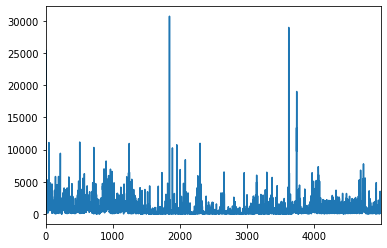

In [28]:
blog_data_sample.text.str.len().plot()

# 2. Preprocess rows of the “text” column (7.5 points)

a. Remove unwanted characters

b. Convert text to lowercase

c. Remove unwanted spaces

d. Remove stopwords

# 3. As we want to make this into a multi-label classification problem, you are required to merge all the label columns together, so that we have all the labels together for a particular sentence (7.5 points)
a. Label columns to merge: “gender”, “age”, “topic”, “sign” b. After completing the previous step, there should be only two columns in your data frame i.e. “text” and “labels” as shown in the below image



In [19]:
blog_data_sample = blog_data_sample.drop(columns=['gender','age','topic','sign','id','date'])

In [21]:
blog_data_sample.head()

,text,label
0,"Info has been found (+/- 100 pages,...","male,15,Student,Leo"
1,These are the team members: Drewe...,"male,15,Student,Leo"
2,In het kader van kernfusie op aarde...,"male,15,Student,Leo"
3,testing!!! testing!!!,"male,15,Student,Leo"
4,Thanks to Yahoo!'s Toolbar I can ...,"male,33,InvestmentBanking,Aquarius"


In [25]:
print(blog_data_sample.count())
print(blog_data_sample.shape)


text     5000
label    5000
dtype: int64
(5000, 2)


In [36]:
nlp = spacy.load('en_core_web_sm')
l1 = ('Yay','btw','cool','Yahoo','legit','Hmmm','mmm','So...')
nlp.Defaults.stop_words.add(l1)


In [14]:
#for i in range(len(new_data.text)):
 #   new_data.text[i] = new_data.text[i].lower()

In [37]:
blog_data_sample.text

0                  Info has been found (+/- 100 pages,...
1                  These are the team members:   Drewe...
2                  In het kader van kernfusie op aarde...
3                        testing!!!  testing!!!          
4                    Thanks to Yahoo!'s Toolbar I can ...
                              ...                        
4995           So... I had another one of those dreams...
4996           mmm... strawberry tea for breakfast. To...
4997           Yay for a new layout!!  Yeah, I know, I...
4998           Ok, so I lied... Fed up isn't playing F...
4999           well, today I went to church and talked...
Name: text, Length: 5000, dtype: object

In [16]:
new_data.dtypes

text     object
label    object
dtype: object

In [40]:
for i in range(len(blog_data_sample.text)):
    tokenizer = RegexpTokenizer(r'\w+')
    blog_data_sample.text[i] = blog_data_sample.text[i].lower()
    word_tokens = tokenizer.tokenize(new_data.text[i])
    filtered_sentence = [w for w in word_tokens if not w in stopwords.words('english')] 
    filtered_sentence = [] 
    for w in word_tokens: 
        if w not in (nlp.Defaults.stop_words or string.punctuation):

            filtered_sentence.append(re.sub(r"[^a-zA-Z0-9]+", ' ',w ))
   
    blog_data_sample.text[i] = " ".join(filtered_sentence)

%time

Wall time: 0 ns


In [41]:
blog_data_sample.text

0       info found 100 pages 4 5 mb pdf files wait unt...
1       team members drewes van der laag urllink mail ...
2       het kader van kernfusie op aarde maak je eigen...
3                                         testing testing
4       thanks yahoo s toolbar capture urls popups mea...
                              ...                        
4995    dreams night time telling fault bobby driving ...
4996    mmm strawberry tea breakfast tomorrow think de...
4997    yay new layout yeah know need complicated even...
4998    ok lied fed isn t playing friday night underdo...
4999    today went church talked music director half h...
Name: text, Length: 5000, dtype: object

In [42]:
X = blog_data_sample.text
Y = blog_data_sample.label

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=524)

In [44]:
def tokenize_test(vect):
    X_train_dtm = vect.fit_transform(X_train)
    print('Features: ', X_train_dtm.shape[1])
    X_test_dtm = vect.transform(X_test)
    nb = MultinomialNB()
    nb.fit(X_train_dtm, y_train)
    y_train_pred = nb.predict(X_train_dtm)
    y_pred_class = nb.predict(X_test_dtm)
    print('Train Accuracy for NB : ', metrics.accuracy_score(y_train,y_train_pred))
    print('Test Accuracy for NB: ', metrics.accuracy_score(y_test, y_pred_class))
    logreg = LogisticRegression(C=1e9)
    logreg.fit(X_train_dtm, y_train)
    y_pred_class_LR = logreg.predict(X_test_dtm)
    y_train_LR = logreg.predict(X_train_dtm)
    print('Train Accuracy for LR: ',metrics.accuracy_score(y_train, y_train_LR))
    print('Test Accuracy for LR: ',metrics.accuracy_score(y_test, y_pred_class_LR))
%time

Wall time: 0 ns


In [45]:
# include 1-grams and 2-grams
vect = CountVectorizer(ngram_range=(1, 2))
tokenize_test(vect)

Features:  234515
Train Accuracy for NB :  0.8813333333333333
Test Accuracy for NB:  0.5656


C:\Users\SUPERMAN1\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\SUPERMAN1\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Train Accuracy for LR:  0.9981333333333333
Test Accuracy for LR:  0.64


In [46]:
X_train_dtm = vect.fit_transform(X_train)
print('Features: ', X_train_dtm.shape[1])
X_test_dtm = vect.transform(X_test)
nb = MultinomialNB()
nb.fit(X_train_dtm, y_train)
y_train_pred = nb.predict(X_train_dtm)
y_pred_class = nb.predict(X_test_dtm)
print('Train Accuracy for NB : ', metrics.accuracy_score(y_train,y_train_pred))
print('Test Accuracy for NB: ', metrics.accuracy_score(y_test, y_pred_class))

Features:  234515
Train Accuracy for NB :  0.8813333333333333
Test Accuracy for NB:  0.5656


In [47]:
feature_names = vect.get_feature_names()
print(feature_names[50:500])

['000 employees', '000 english', '000 far', '000 fighter', '000 financial', '000 flights', '000 ground', '000 guess', '000 human', '000 insurance', '000 jesus', '000 jobs', '000 layers', '000 like', '000 loan', '000 microsoft', '000 miles', '000 month', '000 new', '000 order', '000 payment', '000 people', '000 pledge', '000 points', '000 pound', '000 relief', '000 rich', '000 slaughtered', '000 square', '000 strangers', '000 tanks', '000 texas', '000 times', '000 troops', '000 turn', '000 urllink', '000 usd', '000 votes', '000 wants', '000 won', '000 year', '000 years', '000 yes', '000058', '000058 html', '000miles', '000miles away', '000th', '000th time', '001', '001 dollars', '001 jillian', '002', '002 middle', '003', '003 love', '004', '004 nickname', '005', '005 gender', '006', '006 age', '007', '007 birthday', '007 jersey', '008', '008 height', '009', '009 hair', '00am', '00am know', '00am ride', '00pm', '00pm especially', '00pm figured', '00pm hahahhahaha', '01', '01 08', '01 22'

In [48]:
y_train.head(4)

4245    female,34,indUnk,Sagittarius
3217        male,35,Technology,Aries
4948        female,17,indUnk,Scorpio
3106        male,35,Technology,Aries
Name: label, dtype: object

In [49]:
d = {}

In [50]:
d = y_train.apply(lambda x : pd.value_counts(x.split(","))).sum(axis = 0).to_dict()

In [52]:
mlb = MultiLabelBinarizer()

In [53]:
y_train_mlb = mlb.fit_transform(y_train)

In [54]:
y_test_mlb = mlb.transform(y_test)

In [56]:
LR = LogisticRegression(solver = 'lbfgs',random_state= 111)

In [57]:
clf = OneVsRestClassifier(LR)

In [58]:
names = vect.get_feature_names()

In [59]:
y_train_mlb

array([[1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 1],
       [1, 0, 1, ..., 0, 0, 0],
       ...,
       [1, 0, 0, ..., 0, 0, 1],
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0]])

In [60]:
clf.fit(X_train_dtm,y_train_mlb)
%time

C:\Users\SUPERMAN1\Anaconda3\lib\site-packages\sklearn\multiclass.py:76: UserWarning: Label 0 is present in all training examples.
  str(classes[c]))
C:\Users\SUPERMAN1\Anaconda3\lib\site-packages\sklearn\multiclass.py:76: UserWarning: Label 25 is present in all training examples.
  str(classes[c]))
C:\Users\SUPERMAN1\Anaconda3\lib\site-packages\sklearn\multiclass.py:76: UserWarning: Label 29 is present in all training examples.
  str(classes[c]))
C:\Users\SUPERMAN1\Anaconda3\lib\site-packages\sklearn\multiclass.py:76: UserWarning: Label 35 is present in all training examples.
  str(classes[c]))
C:\Users\SUPERMAN1\Anaconda3\lib\site-packages\sklearn\multiclass.py:76: UserWarning: Label 36 is present in all training examples.
  str(classes[c]))


Wall time: 0 ns


In [61]:
y_pred_clf = clf.predict(X_test_dtm)

In [62]:
print(metrics.accuracy_score(y_test_mlb,y_pred_clf))

0.4832


In [65]:
print(classification_report(y_test_mlb, y_pred_clf))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1250
           1       0.75      0.27      0.39        45
           2       0.86      0.47      0.61       236
           3       0.65      0.35      0.45       236
           4       0.85      0.91      0.88       805
           5       0.85      0.50      0.63       267
           6       0.84      0.86      0.85       739
           7       0.20      0.02      0.03        53
           8       0.79      0.21      0.33       111
           9       0.00      0.00      0.00        23
          10       0.83      0.86      0.85       711
          11       1.00      0.32      0.48        41
          12       0.67      0.22      0.33        64
          13       0.76      0.20      0.32        65
          14       0.00      0.00      0.00        24
          15       0.87      0.48      0.62        27
          16       0.70      0.32      0.44       163
          17       0.00    

C:\Users\SUPERMAN1\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\SUPERMAN1\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [66]:
metrics.average_precision_score(y_test_mlb, y_pred_clf,average='micro')

0.8349521666813599

In [67]:
metrics.recall_score(y_test_mlb, y_pred_clf, labels=None, pos_label=1, average='micro', sample_weight=None)

0.8563887877684747

In [68]:
y_pred_clf[10:15]

array([[1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0,
        0, 0, 0, 1],
       [1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
        0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1,
        1, 0, 0, 0],
       [1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0,
        0, 0, 0, 1],
       [1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0,
        0, 0, 0, 1],
       [1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
        0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1,
        1, 0, 0, 0]])

In [70]:
y_test_mlb[10:15]

array([[1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0,
        0, 0, 0, 1],
       [1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
        0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1,
        1, 0, 0, 0],
       [1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0,
        0, 0, 0, 1],
       [1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
        0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1,
        1, 0, 0, 0],
       [1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
        0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1,
        1, 0, 0, 0]])